In [57]:
import numpy as np
import pandas as pd
import pandas_profiling as pf 
import sklearn
import scipy
import statsmodels.api as sm
import seaborn as sns

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(18,6)})
sns.set_style("white")
sns.set_style("ticks")
# read in data

In [103]:
dat = pd.read_csv('C:/Users/ritwi/Documents/Faron/building.csv',low_memory=False)

In [104]:
dat.columns

Index(['Building ', 'Event_type', 'Event_cost', 'Attendees ',
       'Social_popularity', 'Age(18-24)', 'Age(25-34)', 'Age(35-44)',
       'Age(45-54)', 'Age(55-64)', 'Age(65+)', 'Sex(Female)', 'Against',
       'Little_interest', 'Neutral', 'Somewhat_interest', 'High_interest',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [105]:
dat = dat.drop(columns=['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
                'Unnamed: 24','Unnamed: 25' ])

In [106]:
dat

,Building,Event_type,Event_cost,Attendees,Social_popularity,Age(18-24),Age(25-34),Age(35-44),Age(45-54),Age(55-64),Age(65+),Sex(Female),Against,Little_interest,Neutral,Somewhat_interest,High_interest
0,Building 1,Informational,0,50.0,13,9%,50%,25%,11%,4%,1%,69%,1%,11%,21%,52%,15%
1,Building 1,Informational,0,40.0,9,9%,50%,25%,11%,4%,1%,69%,1%,11%,21%,52%,15%
2,Building 1,Service,0,100.0,15,9%,50%,25%,11%,4%,1%,69%,0%,34%,20%,33%,13%
3,Building 1,Food,"4,000",375.0,25,9%,50%,25%,11%,4%,1%,69%,2%,1%,2%,24%,71%
4,Building 1,Green,0,30.0,14,9%,50%,25%,11%,4%,1%,69%,0%,1%,3%,18%,78%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032226,Building 1,Charity,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032227,Building 1,Charity,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032228,Building 1,Retail,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032229,Building 1,Retail,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
dat = dat.loc[:38, :]

In [108]:
dat

,Building,Event_type,Event_cost,Attendees,Social_popularity,Age(18-24),Age(25-34),Age(35-44),Age(45-54),Age(55-64),Age(65+),Sex(Female),Against,Little_interest,Neutral,Somewhat_interest,High_interest
0,Building 1,Informational,0,50.0,13,9%,50%,25%,11%,4%,1%,69%,1%,11%,21%,52%,15%
1,Building 1,Informational,0,40.0,9,9%,50%,25%,11%,4%,1%,69%,1%,11%,21%,52%,15%
2,Building 1,Service,0,100.0,15,9%,50%,25%,11%,4%,1%,69%,0%,34%,20%,33%,13%
3,Building 1,Food,"4,000",375.0,25,9%,50%,25%,11%,4%,1%,69%,2%,1%,2%,24%,71%
4,Building 1,Green,0,30.0,14,9%,50%,25%,11%,4%,1%,69%,0%,1%,3%,18%,78%
5,Building 1,Informational,0,35.0,22,9%,50%,25%,11%,4%,1%,69%,1%,11%,21%,52%,15%
6,Building 1,Food,264,320.0,15,9%,50%,25%,11%,4%,1%,69%,2%,1%,2%,24%,71%
7,Building 1,Charity,0,20.0,13,9%,50%,25%,11%,4%,1%,69%,0%,2%,11%,39%,48%
8,Building 1,Food,900,350.0,23,9%,50%,25%,11%,4%,1%,69%,2%,1%,2%,24%,71%
9,Building 1,Charity,0,40.0,15,9%,50%,25%,11%,4%,1%,69%,0%,2%,11%,39%,48%


In [109]:
strings = ('Age(18-24)', 'Age(25-34)', 'Age(35-44)',
       'Age(45-54)', 'Age(55-64)', 'Age(65+)', 'Sex(Female)', 'Against',
       'Little_interest', 'Neutral', 'Somewhat_interest', 'High_interest')
for i in strings:
    dat[str(i)] = (dat[str(i)].str.replace(r'%', r'.0').astype('float') / 100.0)

C:\Users\ritwi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
dat['Attendees ']*dat['Age(18-24)']

0      4.50
1      3.60
2      9.00
3     33.75
4      2.70
5      3.15
6     28.80
7      1.80
8     31.50
9      3.60
10    24.75
11    22.50
12    33.75
13     9.00
14     2.70
15     7.20
16     0.90
17    27.00
18    22.50
19    27.00
20     2.16
21     1.35
22    18.00
23     3.60
24     1.80
25    22.50
26    18.00
27     9.00
28     2.70
29     3.60
30     1.98
31     1.80
32    18.00
33     0.90
34     2.25
35     9.00
36     2.25
37     1.80
38    18.00
dtype: float64

In [110]:
x = dat['Attendees ']
for i in strings:
    dat[str(i)] *= x

C:\Users\ritwi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
dat['Event_cost'] = dat['Event_cost'].str.replace(',' , '')

C:\Users\ritwi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
dat['Event_cost'] = pd.to_numeric(dat['Event_cost'])

C:\Users\ritwi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
#Data descriptives
pd.DataFrame.describe(dat)

,Event_cost,Attendees,Age(18-24),Age(25-34),Age(35-44),Age(45-54),Age(55-64),Age(65+),Sex(Female),Against,Little_interest,Neutral,Somewhat_interest,High_interest
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,346.717949,124.897436,11.240769,62.448718,31.224359,13.738718,4.995897,1.248974,86.179231,1.825385,5.128718,6.532564,32.278462,79.132308
std,724.176590,121.877807,10.969003,60.938903,30.469452,13.406559,4.875112,1.218778,84.095687,2.605798,8.311655,4.464110,26.833131,94.715154
min,0.000000,10.000000,0.900000,5.000000,2.500000,1.100000,0.400000,0.100000,6.900000,0.000000,0.150000,0.450000,2.700000,1.200000
25%,0.000000,25.000000,2.250000,12.500000,6.250000,2.750000,1.000000,0.250000,17.250000,0.000000,1.450000,4.000000,9.825000,5.225000
50%,0.000000,50.000000,4.500000,25.000000,12.500000,5.500000,2.000000,0.500000,34.500000,0.200000,2.250000,6.000000,24.000000,18.720000
75%,574.000000,225.000000,20.250000,112.500000,56.250000,24.750000,9.000000,2.250000,155.250000,4.000000,3.750000,8.000000,48.000000,159.750000
max,4000.000000,375.000000,33.750000,187.500000,93.750000,41.250000,15.000000,3.750000,258.750000,7.500000,34.000000,20.000000,90.000000,266.250000


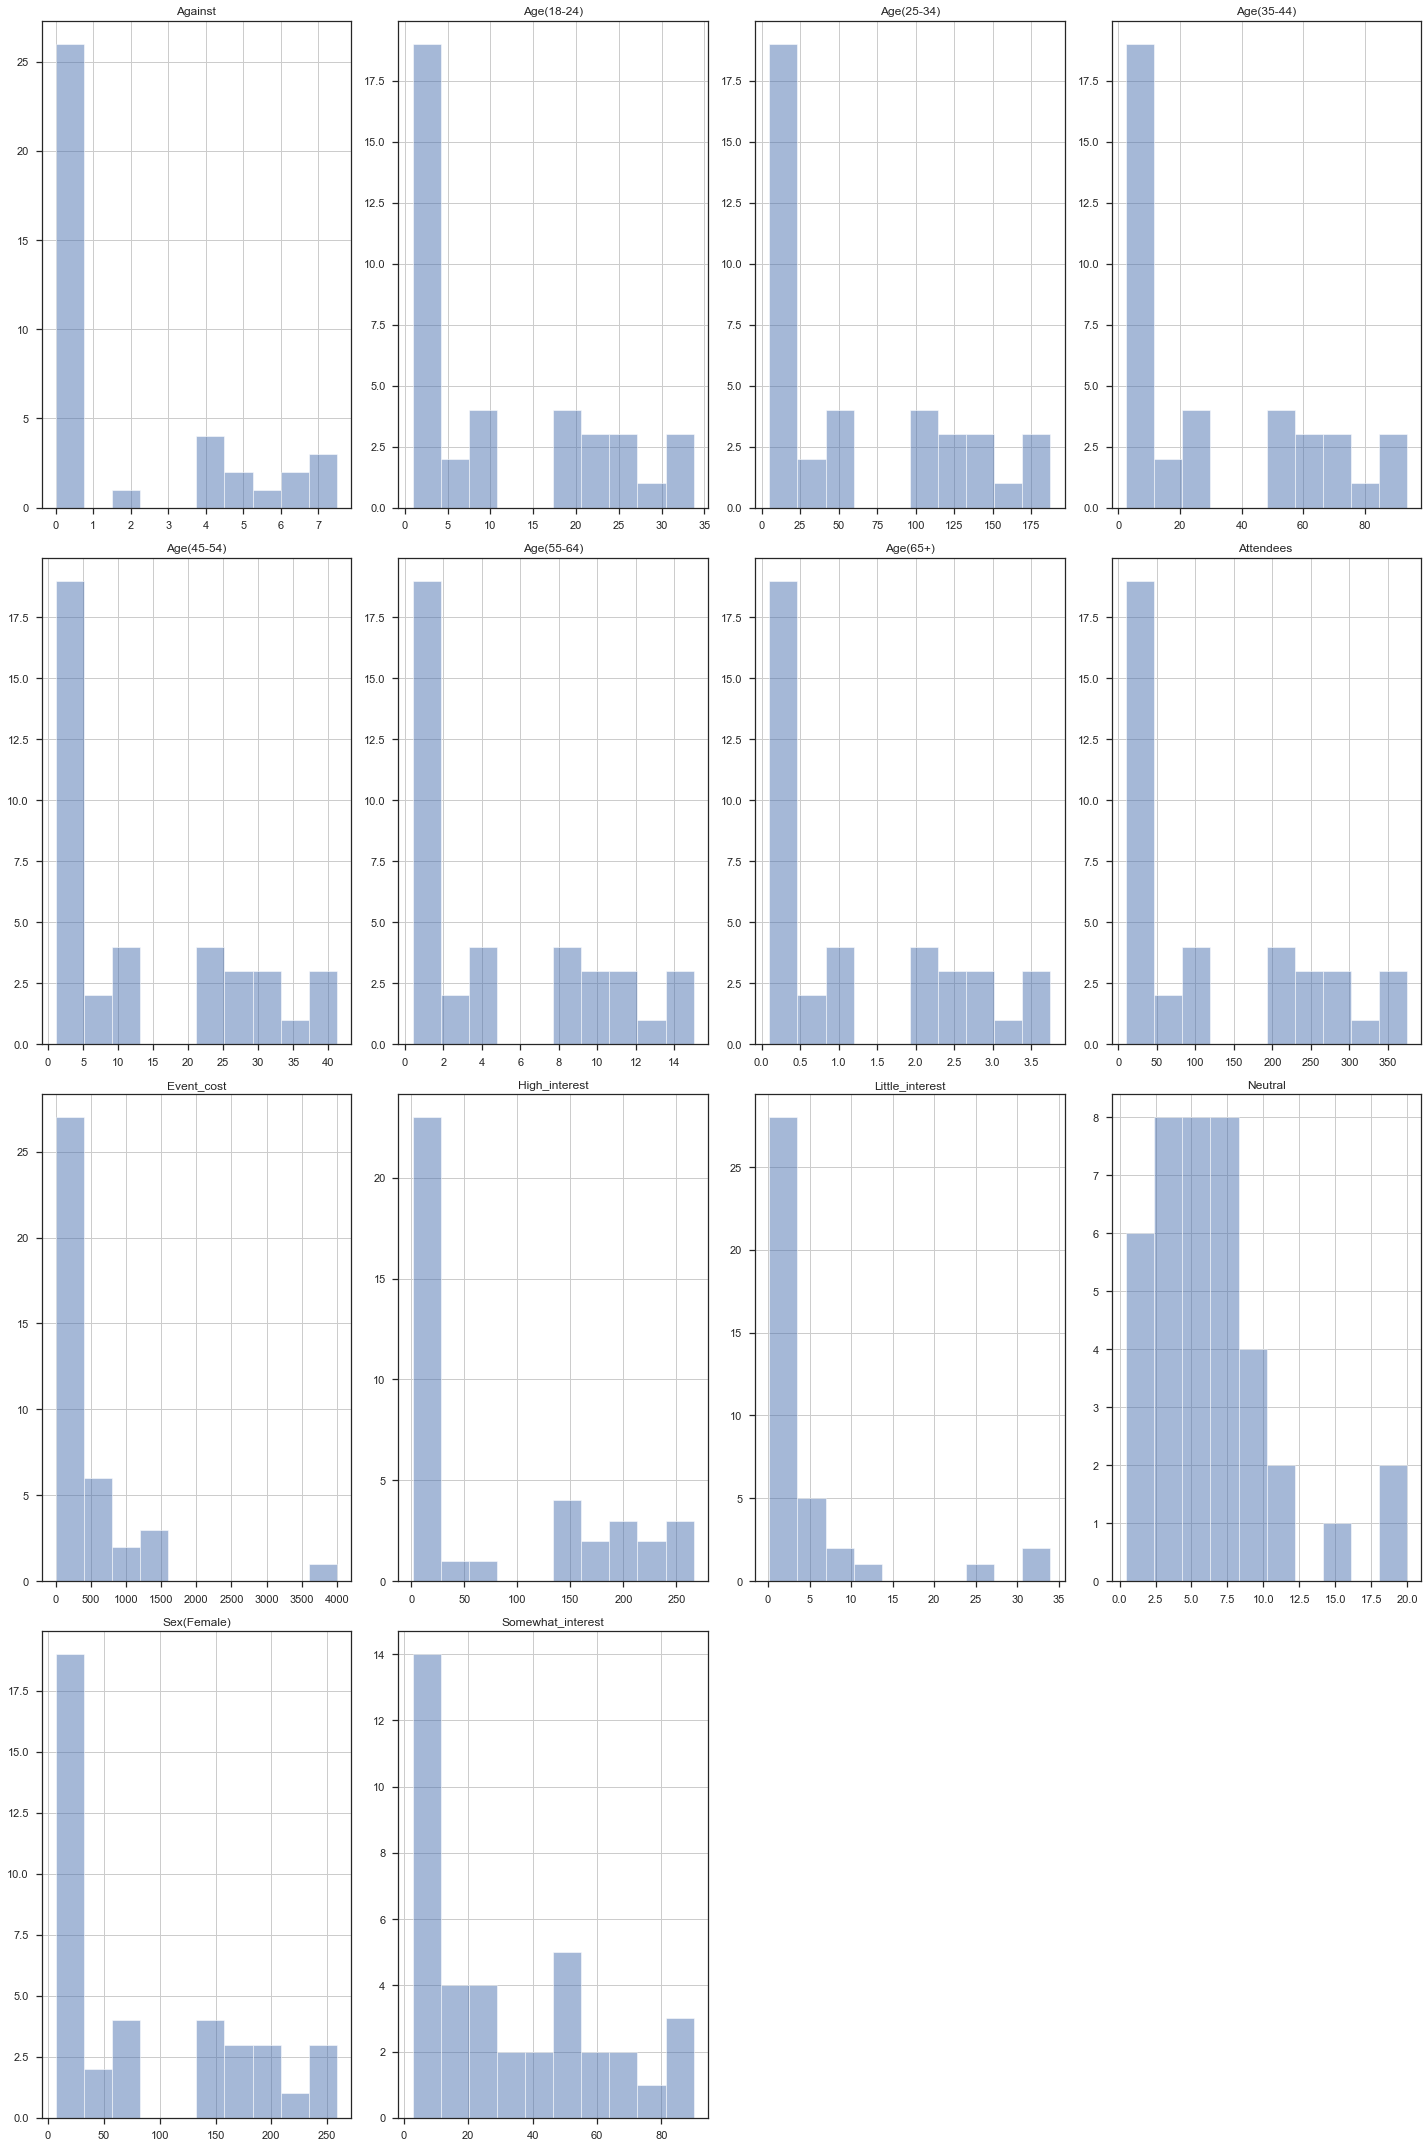

In [119]:
#looking at the distribution of all features to find any correlations 
dat.hist(alpha=0.5,figsize = (20,30))
plt.tight_layout()
plt.show()

[Text(0, 0.5, 'Cost of having the event'), Text(0.5, 0, 'Event type')]

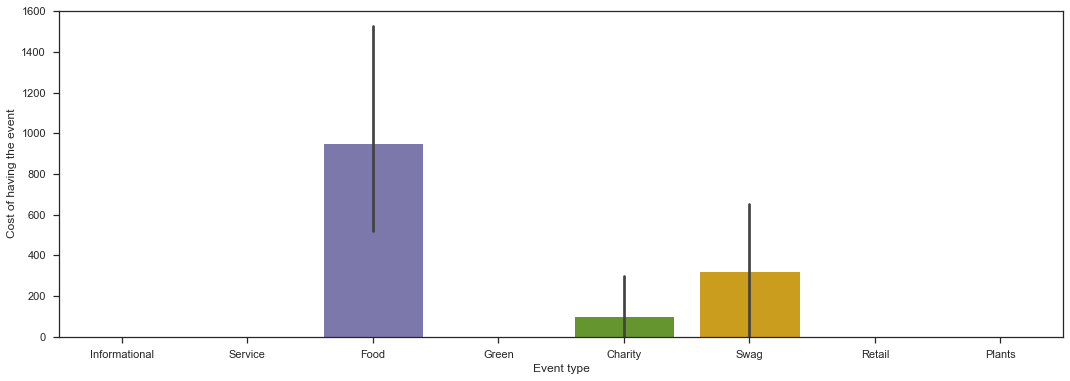

In [278]:
pal= sns.color_palette("Set1")
ax = sns.barplot(x="Event_type", y="Event_cost", data=dat, palette = 'Dark2')
ax.set(xlabel='Event type', ylabel='Cost of having the event')

[Text(0, 0.5, '# Attendees'), Text(0.5, 0, 'Event type')]

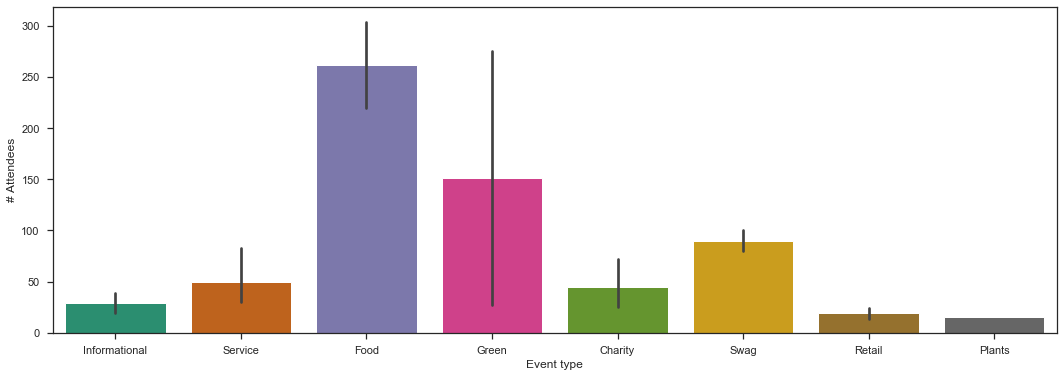

In [279]:
ax = sns.barplot(x="Event_type", y="Attendees ", data=dat, palette = 'Dark2')
ax.set(xlabel='Event type', ylabel='# Attendees')

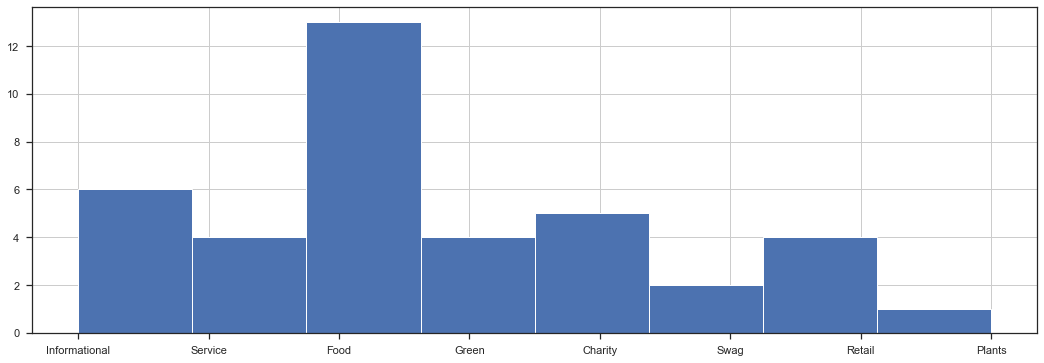

In [162]:
dat['Event_type'].hist(bins = 8)

In [145]:
dat['Male'] = dat['Attendees '] - dat['Sex(Female)']

C:\Users\ritwi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
dat['Female'] = dat['Sex(Female)']

C:\Users\ritwi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
dat = dat.drop(columns = 'Sex(Female)')

In [204]:
 dat.groupby(dat.Event_type).count()[['Attendees ']]

,Attendees
Event_type,
Charity,5
Food,13
Green,4
Informational,6
Plants,1
Retail,4
Service,4
Swag,2


In [207]:
dat.groupby(dat.Event_type).agg('mean') 

,Event_cost,Attendees,Age(18-24),Age(25-34),Age(35-44),Age(45-54),Age(55-64),Age(65+),Against,Little_interest,Neutral,Somewhat_interest,High_interest,Male,Female
Event_type,,,,,,,,,,,,,,,
Charity,100.000000,45.000000,4.050000,22.500000,11.250000,4.950000,1.800000,0.450000,0.000000,0.900000,4.950000,17.550000,21.600000,13.950000,31.050000
Food,951.692308,261.153846,23.503846,130.576923,65.288462,28.726923,10.446154,2.611538,5.223077,2.611538,5.223077,62.676923,185.419231,80.957692,180.196154
Green,0.000000,151.000000,13.590000,75.500000,37.750000,16.610000,6.040000,1.510000,0.000000,1.510000,4.530000,27.180000,117.780000,46.810000,104.190000
Informational,0.000000,29.166667,2.625000,14.583333,7.291667,3.208333,1.166667,0.291667,0.291667,3.208333,6.125000,15.166667,4.375000,9.041667,20.125000
Plants,0.000000,15.000000,1.350000,7.500000,3.750000,1.650000,0.600000,0.150000,0.000000,0.150000,0.450000,2.700000,11.700000,4.650000,10.350000
Retail,0.000000,19.250000,1.732500,9.625000,4.812500,2.117500,0.770000,0.192500,0.385000,1.732500,7.700000,7.122500,2.310000,5.967500,13.282500
Service,0.000000,50.000000,4.500000,25.000000,12.500000,5.500000,2.000000,0.500000,0.000000,17.000000,10.000000,16.500000,6.500000,15.500000,34.500000
Swag,325.000000,90.000000,8.100000,45.000000,22.500000,9.900000,3.600000,0.900000,0.000000,30.600000,18.000000,29.700000,11.700000,27.900000,62.100000


In [181]:
#Scaled_Event_Type = dat.groupby(dat.Event_type).sum().transform(lambda x: (x - x.mean()) / x.std())

In [182]:
#Scaled_Event_Type.head()

,Event_cost,Attendees,Age(18-24),Age(25-34),Age(35-44),Age(45-54),Age(55-64),Age(65+),Against,Little_interest,Neutral,Somewhat_interest,High_interest,Male,Female
Event_type,,,,,,,,,,,,,,,
Charity,-0.275261,-0.336962,-0.336962,-0.336962,-0.336962,-0.336962,-0.336962,-0.336962,-0.373086,-0.767411,-0.365875,-0.259847,-0.333517,-0.336962,-0.336962
Food,2.470298,2.445635,2.445635,2.445635,2.445635,2.445635,2.445635,2.445635,2.473665,0.334906,1.858891,2.454256,2.431026,2.445635,2.445635
Green,-0.390893,-0.004279,-0.004279,-0.004279,-0.004279,-0.004279,-0.004279,-0.004279,-0.373086,-0.709768,-0.707710,-0.181565,0.102479,-0.004279,-0.004279
Informational,-0.390893,-0.380851,-0.380851,-0.380851,-0.380851,-0.380851,-0.380851,-0.380851,-0.299716,-0.215317,0.252832,-0.247715,-0.431674,-0.380851,-0.380851
Plants,-0.390893,-0.521298,-0.521298,-0.521298,-0.521298,-0.521298,-0.521298,-0.521298,-0.373086,-0.930232,-1.618756,-0.577342,-0.449144,-0.521298,-0.521298


In [208]:
Event_Type = dat.groupby(dat.Event_type).mean()#.sort_values('Global_Sales', ascending= False)
Event_Type.head()

,Event_cost,Attendees,Age(18-24),Age(25-34),Age(35-44),Age(45-54),Age(55-64),Age(65+),Against,Little_interest,Neutral,Somewhat_interest,High_interest,Male,Female
Event_type,,,,,,,,,,,,,,,
Charity,100.000000,45.000000,4.050000,22.500000,11.250000,4.950000,1.800000,0.450000,0.000000,0.900000,4.950000,17.550000,21.600000,13.950000,31.050000
Food,951.692308,261.153846,23.503846,130.576923,65.288462,28.726923,10.446154,2.611538,5.223077,2.611538,5.223077,62.676923,185.419231,80.957692,180.196154
Green,0.000000,151.000000,13.590000,75.500000,37.750000,16.610000,6.040000,1.510000,0.000000,1.510000,4.530000,27.180000,117.780000,46.810000,104.190000
Informational,0.000000,29.166667,2.625000,14.583333,7.291667,3.208333,1.166667,0.291667,0.291667,3.208333,6.125000,15.166667,4.375000,9.041667,20.125000
Plants,0.000000,15.000000,1.350000,7.500000,3.750000,1.650000,0.600000,0.150000,0.000000,0.150000,0.450000,2.700000,11.700000,4.650000,10.350000


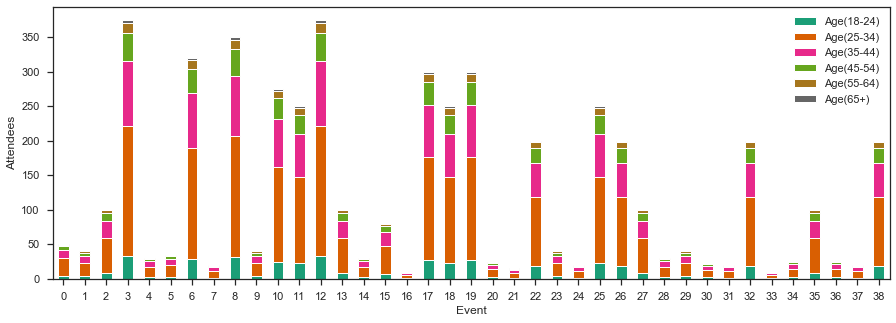

In [324]:

# plt.plot(data)
# fig.suptitle('test title', fontsize=20)
# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
# fig.savefig('test.jpg')

ax = dat[['Age(18-24)', 'Age(25-34)', 'Age(35-44)',
       'Age(45-54)', 'Age(55-64)', 'Age(65+)']].plot(kind='bar', stacked=True,figsize=(15, 5), colormap = 'Dark2')
ax.set_xlabel("Event")
ax.set_ylabel("Attendees")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

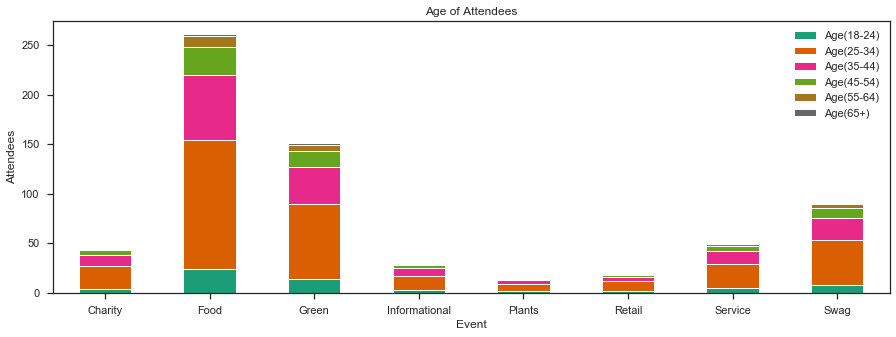

In [323]:
ax2 = Event_Type[['Age(18-24)', 'Age(25-34)', 'Age(35-44)',
       'Age(45-54)', 'Age(55-64)', 'Age(65+)']].plot(kind='bar', stacked=True,figsize=(15, 5), title = 'Age of Attendees'
                                                    , colormap = 'Dark2')

ax2.set_xlabel("Event")
ax2.set_ylabel("Attendees")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0);

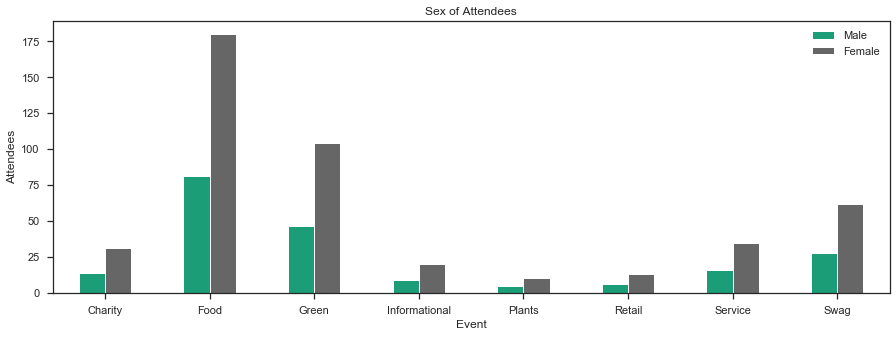

In [322]:
ax3 = Event_Type[['Male','Female']].plot(kind='bar',figsize=(15, 5), title = 'Sex of Attendees', colormap = 'Dark2')

ax3.set_xlabel("Event")
ax3.set_ylabel("Attendees")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0);

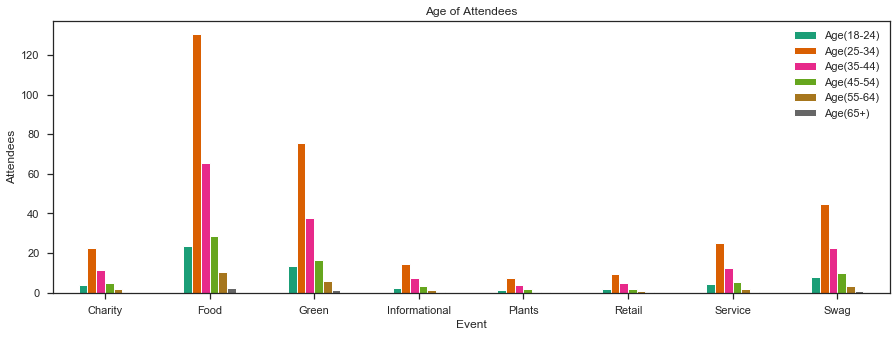

In [321]:
ax4 = Event_Type[['Age(18-24)', 'Age(25-34)', 'Age(35-44)',
       'Age(45-54)', 'Age(55-64)', 'Age(65+)']].plot(kind='bar',figsize=(15, 5), title = 'Age of Attendees', colormap = 'Dark2')

ax4.set_xlabel("Event")
ax4.set_ylabel("Attendees")

ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0);

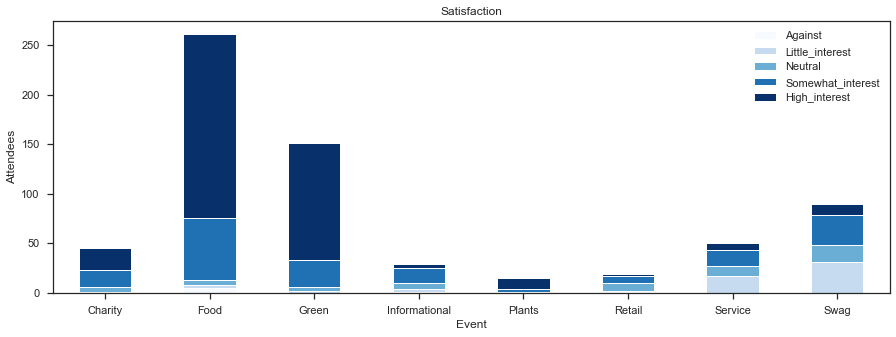

In [327]:
ax5 = Event_Type[['Against', 'Little_interest', 'Neutral', 'Somewhat_interest', 'High_interest']].plot(kind='bar', stacked=True,
                                                                                    title = 'Satisfaction',figsize=(15, 5), colormap = 'Blues')

ax5.set_xlabel("Event")
ax5.set_ylabel("Attendees")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0);

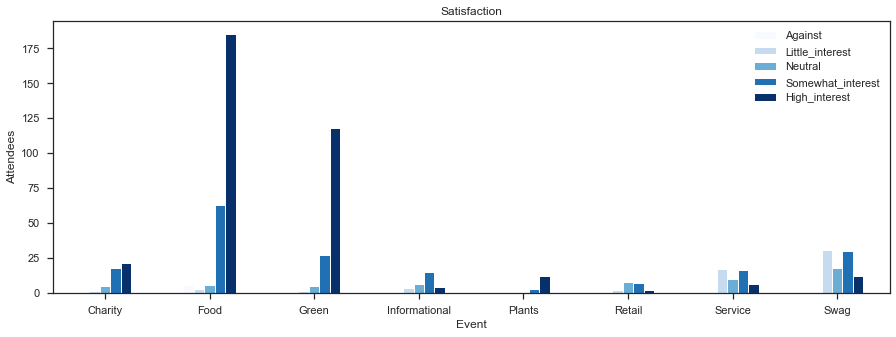

In [328]:
ax6 = Event_Type[['Against', 'Little_interest', 'Neutral', 'Somewhat_interest', 'High_interest']].plot(kind='bar', 
                                                                     title = 'Satisfaction',figsize=(15, 5), colormap = 'Blues')

ax6.set_xlabel("Event")
ax6.set_ylabel("Attendees")
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=0);

In [219]:
Event_Type

,Event_cost,Attendees,Age(18-24),Age(25-34),Age(35-44),Age(45-54),Age(55-64),Age(65+),Against,Little_interest,Neutral,Somewhat_interest,High_interest,Male,Female
Event_type,,,,,,,,,,,,,,,
Charity,100.000000,45.000000,4.050000,22.500000,11.250000,4.950000,1.800000,0.450000,0.000000,0.900000,4.950000,17.550000,21.600000,13.950000,31.050000
Food,951.692308,261.153846,23.503846,130.576923,65.288462,28.726923,10.446154,2.611538,5.223077,2.611538,5.223077,62.676923,185.419231,80.957692,180.196154
Green,0.000000,151.000000,13.590000,75.500000,37.750000,16.610000,6.040000,1.510000,0.000000,1.510000,4.530000,27.180000,117.780000,46.810000,104.190000
Informational,0.000000,29.166667,2.625000,14.583333,7.291667,3.208333,1.166667,0.291667,0.291667,3.208333,6.125000,15.166667,4.375000,9.041667,20.125000
Plants,0.000000,15.000000,1.350000,7.500000,3.750000,1.650000,0.600000,0.150000,0.000000,0.150000,0.450000,2.700000,11.700000,4.650000,10.350000
Retail,0.000000,19.250000,1.732500,9.625000,4.812500,2.117500,0.770000,0.192500,0.385000,1.732500,7.700000,7.122500,2.310000,5.967500,13.282500
Service,0.000000,50.000000,4.500000,25.000000,12.500000,5.500000,2.000000,0.500000,0.000000,17.000000,10.000000,16.500000,6.500000,15.500000,34.500000
Swag,325.000000,90.000000,8.100000,45.000000,22.500000,9.900000,3.600000,0.900000,0.000000,30.600000,18.000000,29.700000,11.700000,27.900000,62.100000


In [220]:
event_type_scaled = Event_Type
event_type_scaled = event_type_scaled.apply(lambda x: x/x.sum(), axis = 1)
event_type_scaled

,Event_cost,Attendees,Age(18-24),Age(25-34),Age(35-44),Age(45-54),Age(55-64),Age(65+),Against,Little_interest,Neutral,Somewhat_interest,High_interest,Male,Female
Event_type,,,,,,,,,,,,,,,
Charity,0.357143,0.160714,0.014464,0.080357,0.040179,0.017679,0.006429,0.001607,0.000000,0.003214,0.017679,0.062679,0.077143,0.049821,0.110893
Food,0.476726,0.130818,0.011774,0.065409,0.032705,0.014390,0.005233,0.001308,0.002616,0.001308,0.002616,0.031396,0.092881,0.040554,0.090265
Green,0.000000,0.250000,0.022500,0.125000,0.062500,0.027500,0.010000,0.002500,0.000000,0.002500,0.007500,0.045000,0.195000,0.077500,0.172500
Informational,0.000000,0.250000,0.022500,0.125000,0.062500,0.027500,0.010000,0.002500,0.002500,0.027500,0.052500,0.130000,0.037500,0.077500,0.172500
Plants,0.000000,0.250000,0.022500,0.125000,0.062500,0.027500,0.010000,0.002500,0.000000,0.002500,0.007500,0.045000,0.195000,0.077500,0.172500
Retail,0.000000,0.250000,0.022500,0.125000,0.062500,0.027500,0.010000,0.002500,0.005000,0.022500,0.100000,0.092500,0.030000,0.077500,0.172500
Service,0.000000,0.250000,0.022500,0.125000,0.062500,0.027500,0.010000,0.002500,0.000000,0.085000,0.050000,0.082500,0.032500,0.077500,0.172500
Swag,0.474453,0.131387,0.011825,0.065693,0.032847,0.014453,0.005255,0.001314,0.000000,0.044672,0.026277,0.043358,0.017080,0.040730,0.090657


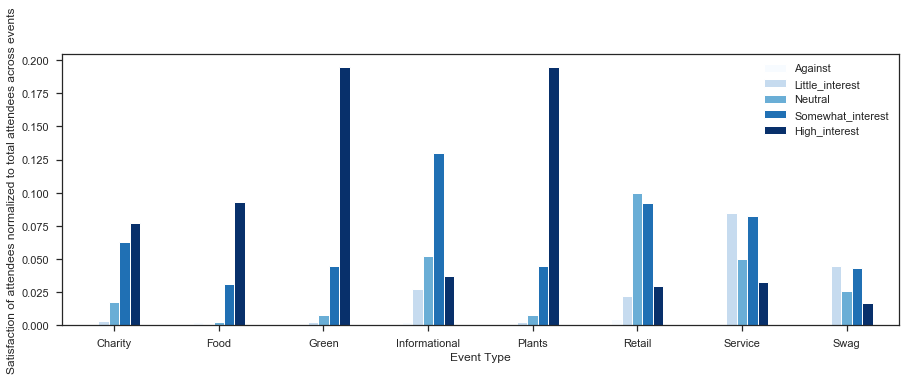

In [329]:
ax10 = event_type_scaled[['Against', 'Little_interest', 'Neutral', 'Somewhat_interest', 'High_interest']].plot(kind='bar', figsize=(15, 5), colormap = 'Blues')

ax10.set_xlabel("Event Type")
ax10.set_ylabel("Satisfaction of attendees normalized to total attendees across events")
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=0);

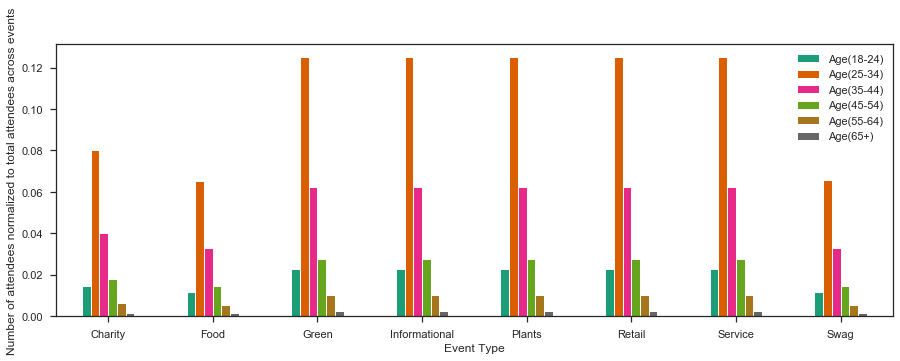

In [319]:
ax11 = event_type_scaled[['Age(18-24)', 'Age(25-34)', 'Age(35-44)',
       'Age(45-54)', 'Age(55-64)', 'Age(65+)']].plot(kind='bar',figsize=(15, 5), colormap = 'Dark2')
ax11.set_xlabel("Event Type")
ax11.set_ylabel("Number of attendees normalized to total attendees across events")
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=0);

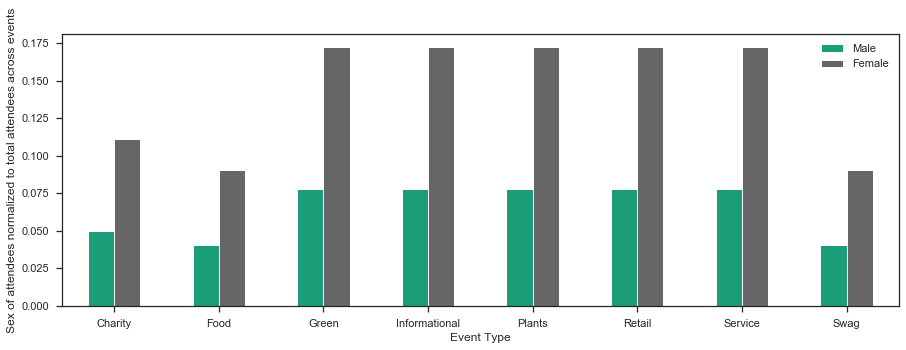

In [320]:
ax12 = event_type_scaled[['Male','Female']].plot(kind='bar',figsize=(15, 5), colormap = "Dark2")

ax12.set_xlabel("Event Type")
ax12.set_ylabel("Sex of attendees normalized to total attendees across events")
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=0);

In [ ]:
event_with_age = Video_game_sales[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].groupby(Video_game_sales.Genre).sum()
type(genre_with_year)
#genre_with_year = pd.DataFrame(genre_with_year)
genre_with_year = genre_with_year.reset_index()
genre_with_year = genre_with_year.rename(columns={"NA_Sales": "North America", "EU_Sales": "Europe", "JP_Sales":"Japan" , "Other_Sales": "Other"})
genre_with_year.head()

In [ ]:
df1 = genre_with_year.melt('Genre')

In [ ]:
#Scaled values of y
color_scale = alt.Scale(
         domain=['North America', 'Europe', 'Japan', 'Other'],
         range=['#1b9e77', '#d95f02', '#7570b3', '#e7298a'])
import altair as alt
alt.Chart(df1).mark_bar().encode(
        x = 'Genre:N',
        y = alt.Y('value', axis = alt.Axis(title = 'Normalized sales', ticks = True)),
        color = alt.Color('variable', legend = alt.Legend(title = 'Country',fillColor='#FFFFFF'),
                                                          scale = color_scale )
).configure_axis(labelFontSize = 14,
                titleFontSize = 20
                ).configure_legend(
                                  labelFontSize = 14,
                                  titleFontSize = 14,
                                  padding = 10, 
                                  strokeColor = 'black',
                                  fillColor = 'white',
                                  cornerRadius = 10
                                  ).properties(width = 700, height = 400)
